# Разведочный анализ , KotlovMA FIT23


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # устанавливаем seaborn по умолчанию для отрисовки графиков

In [1]:
%pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [ ]:
from ucimlrepo import fetch_ucirepo 

In [ ]:
# fetch dataset 
secondary_mushroom = fetch_ucirepo(id=848) 

In [ ]:
# data (as pandas dataframes) 
X = secondary_mushroom.data.features 
y = secondary_mushroom.data.targets 

{'uci_id': 848, 'name': 'Secondary Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/848/data.csv', 'abstract': 'Dataset of simulated mushrooms for binary classification into edible and poisonous.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 61068, 'num_features': 20, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2021, 'last_updated': 'Wed Apr 10 2024', 'dataset_doi': '10.24432/C5FP5Q', 'creators': ['Dennis Wagner', 'D. Heider', 'Georges Hattab'], 'intro_paper': {'ID': 259, 'type': 'NATIVE', 'title': 'Mushroom data creation, curation, and simulation to support classification tasks', 'authors': 'Dennis Wagner, D. Heider, Georges Hattab', 'venue': 'Scientific Reports', 'year': 2021, 'journal': None, '

In [ ]:
# metadata 
print(secondary_mushroom.metadata) 
# variable information 
print(secondary_mushroom.variables) 

In [3]:
print(X)
print(y)

       cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
0             15.26         x           g         o                    f   
1             16.60         x           g         o                    f   
2             14.07         x           g         o                    f   
3             14.17         f           h         e                    f   
4             14.64         x           h         o                    f   
...             ...       ...         ...       ...                  ...   
61064          1.18         s           s         y                    f   
61065          1.27         f           s         y                    f   
61066          1.27         s           s         y                    f   
61067          1.24         f           s         y                    f   
61068          1.17         s           s         y                    f   

      gill-attachment gill-spacing gill-color  stem-height  stem-width  \
0            

In [6]:
X.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,15.26,x,g,o,f,e,NaN,w,16.95,17.09,s,y,w,u,w,t,g,NaN,d,w
1,16.60,x,g,o,f,e,NaN,w,17.99,18.19,s,y,w,u,w,t,g,NaN,d,u
2,14.07,x,g,o,f,e,NaN,w,17.80,17.74,s,y,w,u,w,t,g,NaN,d,w
3,14.17,f,h,e,f,e,NaN,w,15.77,15.98,s,y,w,u,w,t,p,NaN,d,w
4,14.64,x,h,o,f,e,NaN,w,16.53,17.20,s,y,w,u,w,t,p,NaN,d,w


In [7]:
y.head()

,class
0,p
1,p
2,p
3,p
4,p


1. Title: Secondary mushroom data

2. Sources:
	(a) Mushroom species drawn from source book:
		Patrick Hardin.Mushrooms & Toadstools.
	    Zondervan, 1999
	(b) Inspired by this mushroom data:
		Jeff Schlimmer.Mushroom Data Set. Apr. 1987.
		url:https://archive.ics.uci.edu/ml/datasets/Mushroom.
	(c) Repository containing the related Python scripts and all the data sets: https://mushroom.mathematik.uni-marburg.de/files/ 
	(d) Author: Dennis Wagner
	(e) Date: 05 September 2020

3. Relevant information:
	This dataset includes 61069 hypothetical mushrooms with caps based on 173 species (353 mushrooms
	per species). Each mushroom is identified as definitely edible, definitely poisonous, or of 
	unknown edibility and not recommended (the latter class was combined with the poisonous class).
	Of the 20 variables, 17 are nominal and 3 are metrical.

4. Data simulation:
	The related Python project (Sources (c)) contains a Python module secondary_data_generation.py
	used to generate this data based on primary_data_edited.csv also found in the repository.
	Both nominal and metrical variables are a result of randomization.
	The simulated and ordered by species version is found in secondary_data_generated.csv.
	The randomly shuffled version is found in secondary_data_shuffled.csv.

5. Class information:
	1. class		poisonous=p, edibile=e (binary)

6. Variable Information:
   (n: nominal, m: metrical; nominal values as sets of values)
   1. cap-diameter (m):			float number in cm
   2. cap-shape (n):            bell=b, conical=c, convex=x, flat=f,
                                sunken=s, spherical=p, others=o
   3. cap-surface (n):          fibrous=i, grooves=g, scaly=y, smooth=s,
								shiny=h, leathery=l, silky=k, sticky=t,
								wrinkled=w, fleshy=e
   4. cap-color (n):            brown=n, buff=b, gray=g, green=r, pink=p,
								purple=u, red=e, white=w, yellow=y, blue=l, 
								orange=o,  black=k
   5. does-bruise-bleed (n):	bruises-or-bleeding=t,no=f
   6. gill-attachment (n):      adnate=a, adnexed=x, decurrent=d, free=e, 
								sinuate=s, pores=p, none=f, unknown=?
   7. gill-spacing (n):         close=c, distant=d, none=f
   8. gill-color (n):           see cap-color + none=f
   9. stem-height (m):			float number in cm
   10. stem-width (m):			float number in mm   
   11. stem-root (n):           bulbous=b, swollen=s, club=c, cup=u, equal=e,
                                rhizomorphs=z, rooted=r
   12. stem-surface (n): 		see cap-surface + none=f
   13. stem-color (n):			see cap-color + none=f
   14. veil-type (n):           partial=p, universal=u
   15. veil-color (n):          see cap-color + none=f
   16. has-ring (n):            ring=t, none=f
   17. ring-type (n):           cobwebby=c, evanescent=e, flaring=r, grooved=g, 
							    large=l, pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=?
   18. spore-print-color (n):   see cap color
   19. habitat (n):             grasses=g, leaves=l, meadows=m, paths=p, heaths=h,
                                urban=u, waste=w, woods=d
   20. season (n):				spring=s, summer=u, autumn=a, winter=w


In [8]:
X.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


Вспомните, что обозначают эти результаты? Какие предварительные выводы можно сделать из этих данных?

Проанализируем нечисловые данные.

In [9]:
X.describe(include=['O'])

,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
count,61069,46949,61069,61069,51185,36006,61069,9531,22945,61069,3177,7413,61069,58598,6354,61069,61069
unique,7,11,12,2,7,3,12,5,8,13,1,6,2,8,7,8,4
top,x,t,n,f,a,c,w,s,s,w,u,w,f,f,k,d,a
freq,26934,8196,24218,50479,12698,24710,18521,3177,6025,22926,3177,5474,45890,48361,2118,44209,30177


Разберемся, что обозначают эти поля и значения.

`count` - количество непустых значений. Обратите внимание, что количество проставленных номеров кают - 204, а проставленных портов посадки - 889. Всего же записей в таблице - 891.

`unique` - количество уникальных записей. Очевидно, что все имена пассажиров из этой таблицы известны, а вот номеров кают всего 147.

`top` - наиболее часто повторяющаяся запись.

`freq` - частота самой частой записи. Эти две строки интересно анализировать вместе. В этом наборе данных большинство мужчины - 577; 644 человека сели на борт в Саутгемптоне; по билету 347082 путешествовало семь человек.

Что еще вы можете сказать, глядя на эту таблицу?

Например, интересно было бы рассмотреть подробее, какие пассажиры прошли по билету '347082'.

Метод `describe` приводит общую статистику по конкретным полям таблицы. Но для полного представления о данных нужно знать типы полей, количество непустых записей и т.п.

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cap-diameter          61069 non-null  float64
 1   cap-shape             61069 non-null  object 
 2   cap-surface           46949 non-null  object 
 3   cap-color             61069 non-null  object 
 4   does-bruise-or-bleed  61069 non-null  object 
 5   gill-attachment       51185 non-null  object 
 6   gill-spacing          36006 non-null  object 
 7   gill-color            61069 non-null  object 
 8   stem-height           61069 non-null  float64
 9   stem-width            61069 non-null  float64
 10  stem-root             9531 non-null   object 
 11  stem-surface          22945 non-null  object 
 12  stem-color            61069 non-null  object 
 13  veil-type             3177 non-null   object 
 14  veil-color            7413 non-null   object 
 15  has-ring           

## Заполнение пропусков

In [11]:
X.isnull().sum()

cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

Заполнить пропуски в категориальных признаках можно следующими способами:
- Заменить пропущенное значение новой категорией "Неизвестно".
- Заменить пропущенное значение наиболее популярным значением.

Для числовых признаков можно использовать усечённое среднее или медиану.

Существует 3 вида пропусков: полностью случайные, случайные и неслучайные. Восстановить автоматически возможно (по крайней мере теоретически) только пропуски первого типа.

Попробуем заменить пропуски в поле Age. Сначала посмотрим подробнее на это поле.

In [ ]:
train.Age.describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


In [ ]:
train['Age'].sort_values().unique()

array([ 0.42,  0.67,  0.75,  0.83,  0.92,  1.  ,  2.  ,  3.  ,  4.  ,
        5.  ,  6.  ,  7.  ,  8.  ,  9.  , 10.  , 11.  , 12.  , 13.  ,
       14.  , 14.5 , 15.  , 16.  , 17.  , 18.  , 19.  , 20.  , 20.5 ,
       21.  , 22.  , 23.  , 23.5 , 24.  , 24.5 , 25.  , 26.  , 27.  ,
       28.  , 28.5 , 29.  , 30.  , 30.5 , 31.  , 32.  , 32.5 , 33.  ,
       34.  , 34.5 , 35.  , 36.  , 36.5 , 37.  , 38.  , 39.  , 40.  ,
       40.5 , 41.  , 42.  , 43.  , 44.  , 45.  , 45.5 , 46.  , 47.  ,
       48.  , 49.  , 50.  , 51.  , 52.  , 53.  , 54.  , 55.  , 55.5 ,
       56.  , 57.  , 58.  , 59.  , 60.  , 61.  , 62.  , 63.  , 64.  ,
       65.  , 66.  , 70.  , 70.5 , 71.  , 74.  , 80.  ,   nan])

Заменим пропуски на медианное значение. Как вы думаете, правильно ли мы делаем?

In [ ]:
train.Age = train.Age.fillna(train.Age.median())
train.Age.describe()

,Age
count,891.000000
mean,29.361582
std,13.019697
min,0.420000
25%,22.000000
50%,28.000000
75%,35.000000
max,80.000000


Что касается порта посадки, у нас есть всего 2 записи, для которых он неизвестен.

In [ ]:
train[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


В данном случае можно не пытаться угадать, потому что на самом-то деле он известен: https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html

`Mrs Stone boarded the Titanic in Southampton on 10 April 1912 and was travelling in first class with her maid Amelie Icard. She occupied cabin B-28.`

In [ ]:
train.Embarked.fillna('S', inplace=True)

Информативно заполнить пропущенные значения столбца `Cabin` не представляется возможным, но можно использовать ещё один способ борьбы с пропусками — удаление ;-) В данном случае удалим столбец.

In [ ]:
train.drop(columns=['Cabin'], inplace=True)
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


## Визуализация распределений и взаимосвязей

Поговорим о признаках, которые можно выделить при анализе этих данных. Из лекций вы знаете, что выделяют количественные (числовые), категориальные и бинарные признаки.

Разделите признаки по этим типам. Можно ли считать поле `Cabin` числовым признаком?

Выделяют визуализацию по одному признаку и во взаимосвязи признаков.

В прошлом семестре мы учились пользоваться для визуализации библиотекой `matplotlib`. Построим гистограмму, демонстрирующую количество выживших в этом наборе данных.

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

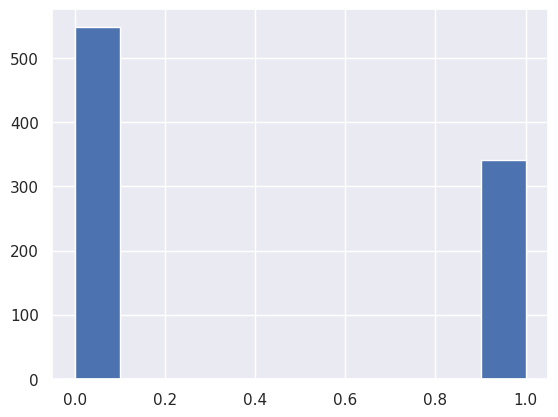

In [ ]:
plt.hist(train['Survived'])

Для визуализации данных существует огромное количество библиотек для Python. Одной из самых популярных является библиотека `seaborn`, которая, по сути, представляет собой надстройку над `matplotlib`.

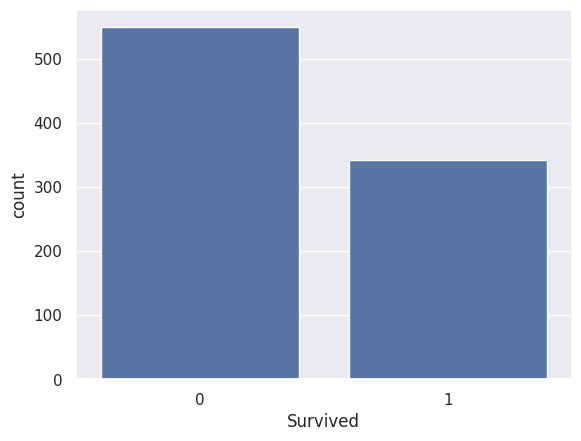

In [ ]:
sns.countplot(x=train["Survived"]);

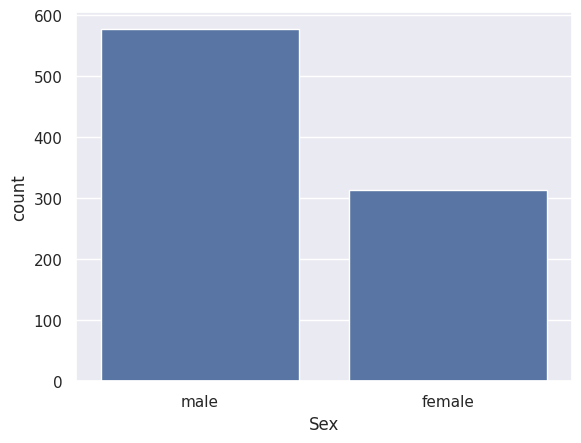

In [ ]:
sns.countplot(x=train["Sex"]);

Посмотрите на гистограмму, полученную ячейкой выше. Соответствует ли она выводам, которые мы сделали после применения `discribe`?

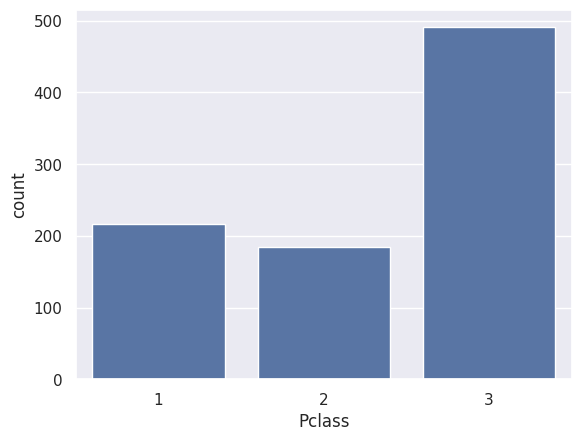

In [ ]:
sns.countplot(x=train["Pclass"]);

Подтвердились ли наши выводы о количестве пассажиров разного класса обслуживания?



Но больше информации мы можем получить из визуализации взаимосвязи пар признаков.

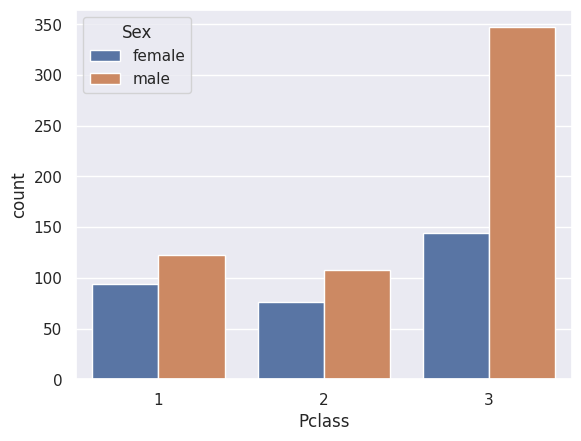

In [ ]:
sns.countplot(data=train, x="Pclass", hue='Sex');

Какие выводы можно сделать, глядя на гистограмму выше? Почему нужно знать экономическую ситуацию в Англии и Ирландии, чтобы понять эту картинку?

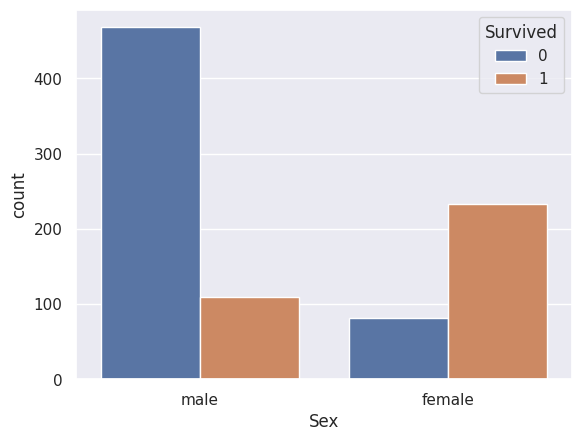

In [ ]:
sns.countplot(data=train, x="Sex", hue='Survived');

А чем объяснить эту взаимосвязь?

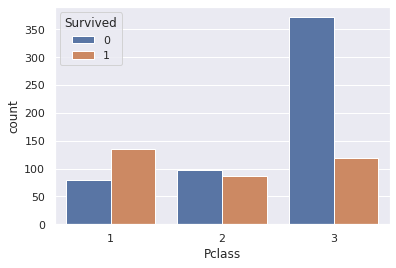

In [ ]:
sns.countplot(data=train, x="Pclass", hue='Survived');

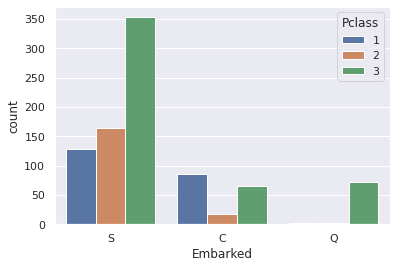

In [ ]:
sns.countplot(data=train, x='Embarked', hue='Pclass');

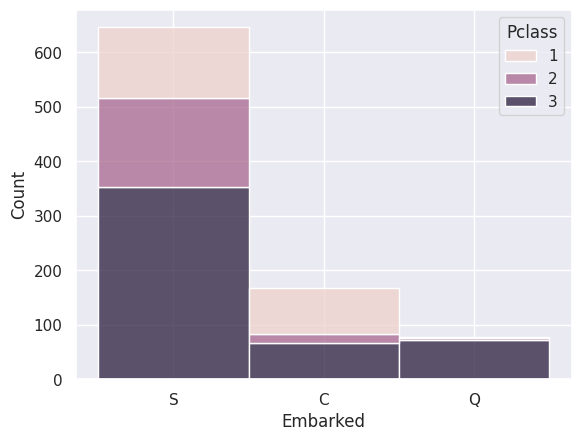

In [ ]:
sns.histplot(train, x="Embarked", hue="Pclass", multiple="stack");

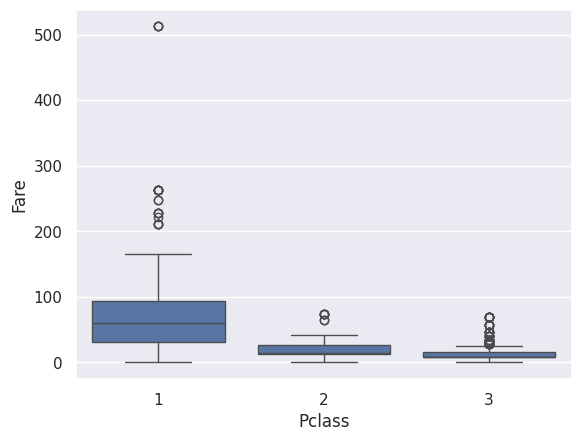

In [ ]:
sns.boxplot(data=train, y='Fare', x='Pclass');

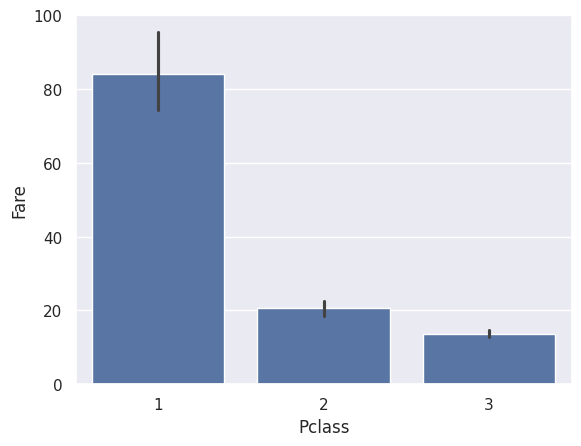

In [ ]:
sns.barplot(data=train, x="Pclass", y='Fare');

Или так... Какую гистограмму легче анализировать?

Попробуйте сделать полезные умозаключения, гляда на полученные гистограммы. Это нужно делать для того, чтобы определить важные для построения модели машинного обучения признаки (и неважные тоже :))

Еще раз посмотрим на распределение возраста людей, описанных в этом наборе данных.

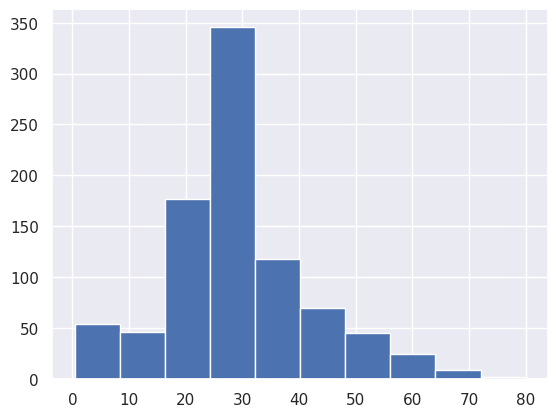

In [ ]:
train.Age.hist();

Попробуем совместить на одном графике возраст и информацию о выживаемости этих людей.

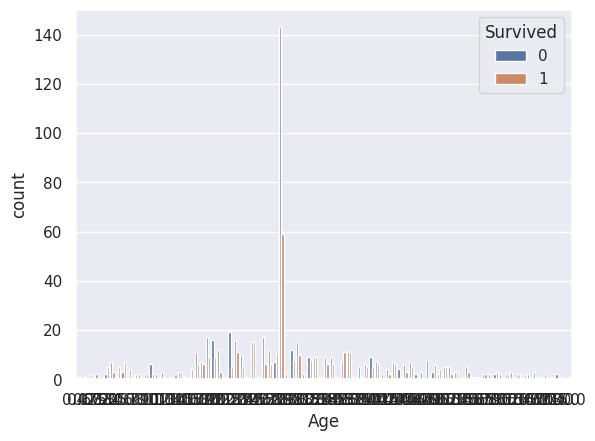

In [ ]:
sns.countplot(data=train, x="Age", hue='Survived');

Нетрудно заметить, что эта гистограмма не читаема, нужно сделать по-другому, например, сгруппировать данные по диапазонам возрастов.

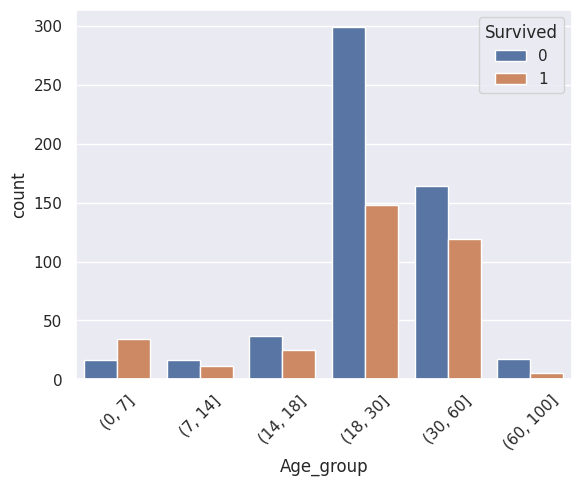

In [ ]:
train["Age_group"] = pd.cut(x=train['Age'], bins=[0, 7, 14, 18, 30, 60, 100])
plt.xticks(rotation=45)
sns.countplot(data=train, hue='Survived', x='Age_group');

Какие еще зависимости пар признаков можно было бы визуализовать, чтобы выделить важные для исследования признаки?

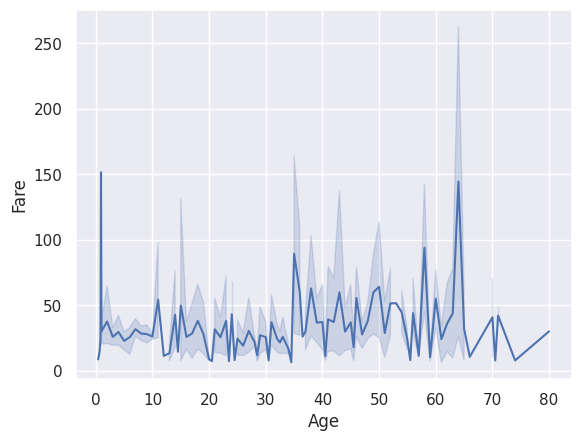

In [ ]:
sns.lineplot(data=train, x='Age', y='Fare');

Кажется, на Титанике не было «детских билетов».

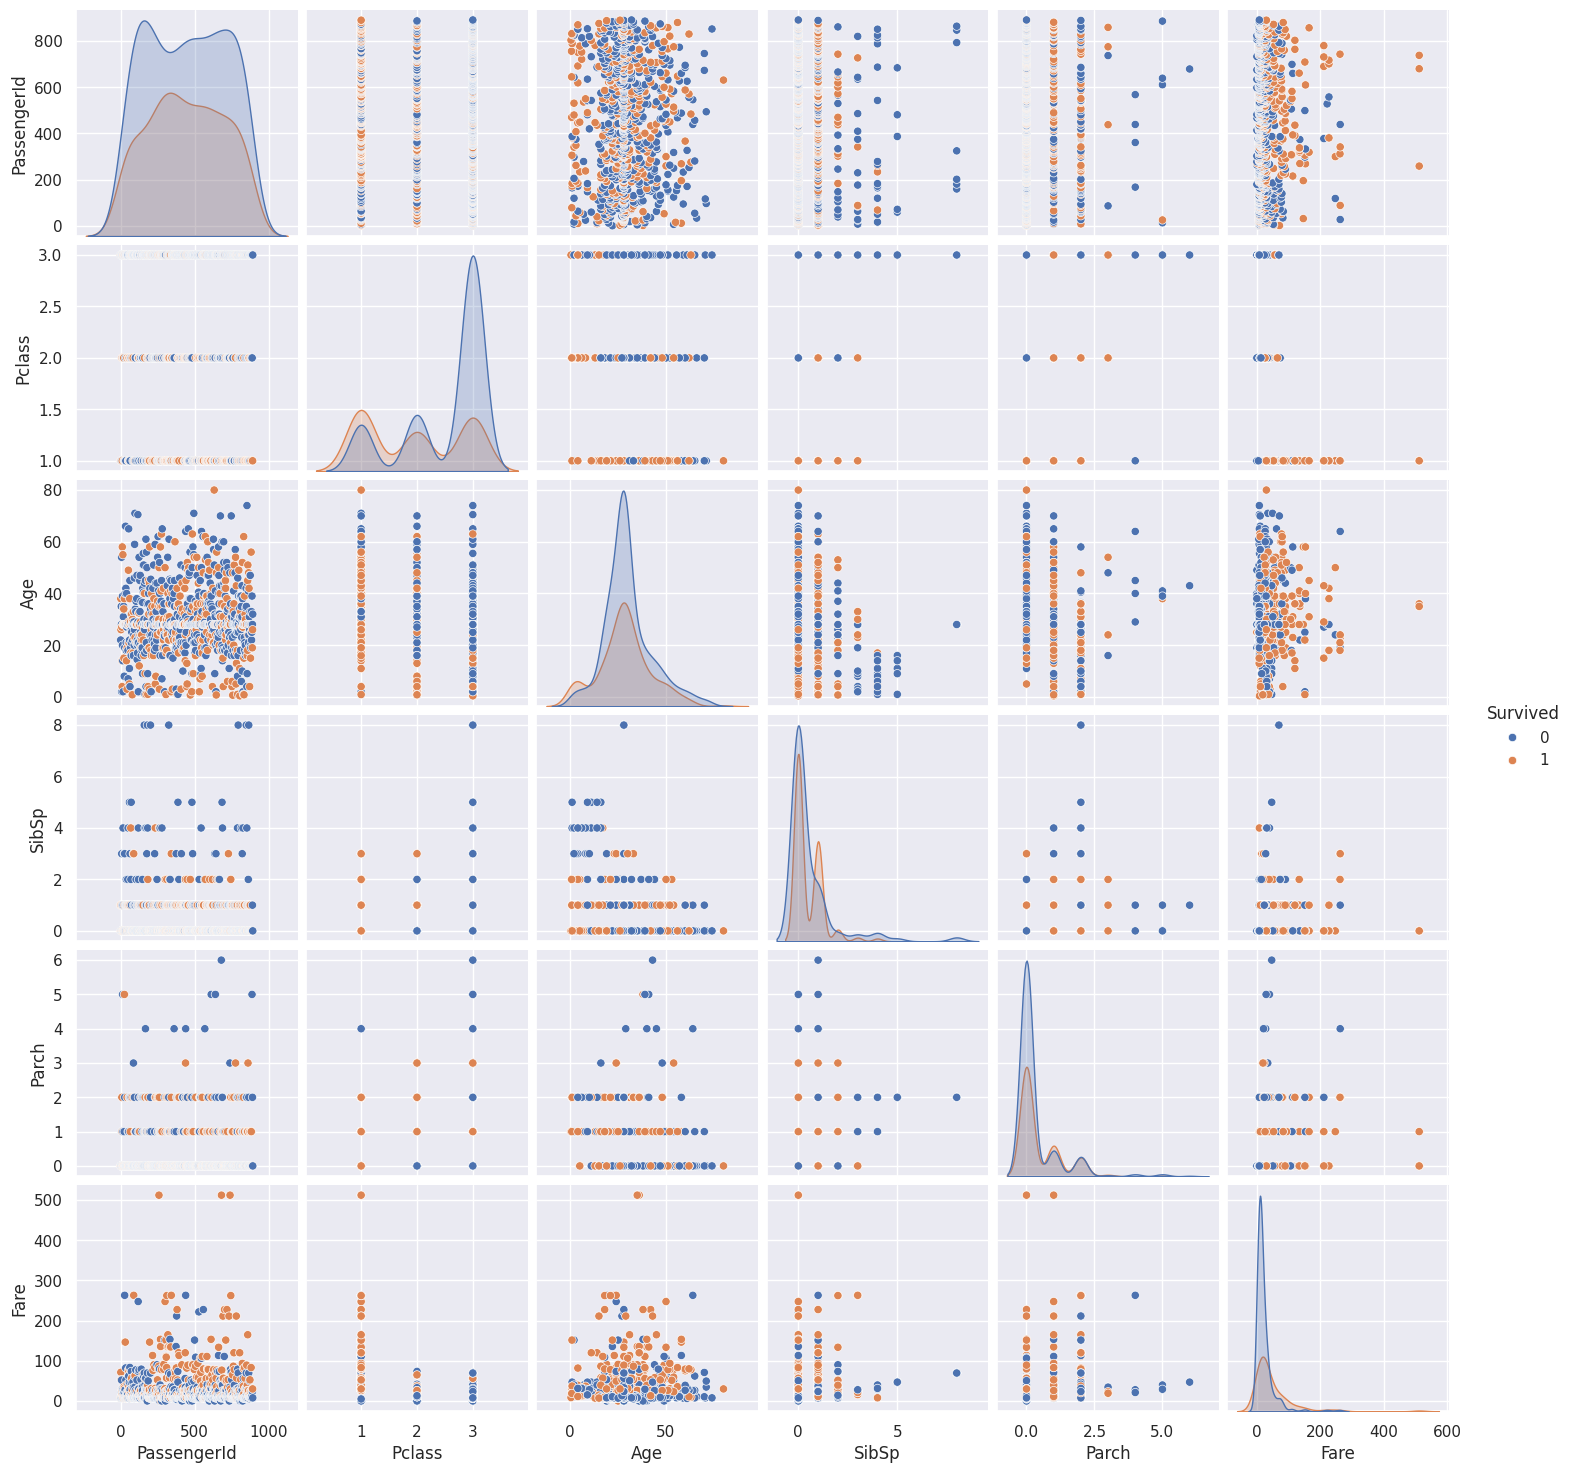

In [ ]:
sns.pairplot(train, kind="scatter", hue="Survived");

## Нормализация

Алгоритмы машинного обучения, как правило, работают лучше или сходятся быстрее, когда различные функции (переменные) имеют меньший масштаб. Поэтому перед обучением на них моделей машинного обучения данные обычно нормализуются.

1. Мин-макс нормализация преобразует каждое значение данных в значение от 0 до 1

$$x_{norm}=\frac{x-x_{min}}{x_{max}-x_{min}}$$

2. Средняя нормализация масштабирует значения таким образом, чтобы среднее значение всех значений было равно 0, а стандартное отклонение (дисперсия) -  1.

$$x_{norm}=\frac{x-x_{mean}}{x_{std}}$$

Проведем нормализацию значений возраста и стоимости билета.
Нормализацию можно провести вручную с использованием приведенных выше формул, а можно воспользоваться инструментами библиотеки `scikit-learn.preprocessing`

Для разных моделей нужна разная нормализация: для метрических моделей (например, KNN) нужна минимакс нормализация, а для линейных (например, SVM) z-нормализация (стандартизация). https://scikit-learn.org/stable/modules/preprocessing.html

И снова построим график зависимости.

In [ ]:
from sklearn.preprocessing import MinMaxScaler  # StandardScaler

scaler_mm = MinMaxScaler()

train[['mmAge', 'mmFare']] = scaler_mm.fit_transform(train[['Age', 'Fare']])
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_group,mmAge,mmFare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,"(18, 30]",0.271174,0.014151
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,"(30, 60]",0.472229,0.139136
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,"(18, 30]",0.321438,0.015469
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,"(30, 60]",0.434531,0.103644
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,"(30, 60]",0.434531,0.015713


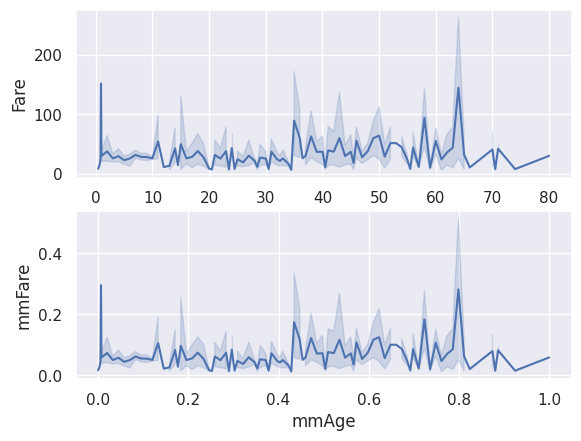

In [ ]:
_, axs = plt.subplots(nrows=2)
sns.lineplot(data=train, x='Age', y='Fare', ax=axs[0])
sns.lineplot(data=train, x='mmAge', y='mmFare', ax=axs[1]);

## Кодирование категориальных признаков

`OrdinalEncoder` и `OneHotEncoder` - часть библиотеки `scikit-learn` в Python и используются для преобразования категориальных или текстовых признаков в числа, которые предсказательные модели понимают лучше.

`sklearn.preprocessing.OrdinalEncoder` раздает категориальным признакам значения от 0 до $n$, где $n$ - это количество различных значений в данном столбце. Это может быть неправильно, так как может запутать модель машинного обучения, наложив на значения числовой порядок.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
train[['Sex', 'Ticket']] = enc.fit_transform(train[['Sex', 'Ticket']])
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_group,mmAge,mmFare
0,1,0,3,"Braund, Mr. Owen Harris",1.0,22.0,1,0,523.0,7.2500,S,"(18, 30]",0.271174,0.014151
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1,0,596.0,71.2833,C,"(30, 60]",0.472229,0.139136
2,3,1,3,"Heikkinen, Miss. Laina",0.0,26.0,0,0,669.0,7.9250,S,"(18, 30]",0.321438,0.015469
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1,0,49.0,53.1000,S,"(30, 60]",0.434531,0.103644
4,5,0,3,"Allen, Mr. William Henry",1.0,35.0,0,0,472.0,8.0500,S,"(30, 60]",0.434531,0.015713


In [ ]:
enc.categories_

[array(['female', 'male'], dtype=object),
 array(['110152', '110413', '110465', '110564', '110813', '111240',
        '111320', '111361', '111369', '111426', '111427', '111428',
        '112050', '112052', '112053', '112058', '112059', '112277',
        '112379', '113028', '113043', '113050', '113051', '113055',
        '113056', '113059', '113501', '113503', '113505', '113509',
        '113510', '113514', '113572', '113760', '113767', '113773',
        '113776', '113781', '113783', '113784', '113786', '113787',
        '113788', '113789', '113792', '113794', '113796', '113798',
        '113800', '113803', '113804', '113806', '113807', '11668', '11751',
        '11752', '11753', '11755', '11765', '11767', '11769', '11771',
        '11774', '11813', '11967', '12233', '12460', '12749', '13049',
        '13213', '13214', '13502', '13507', '13509', '13567', '13568',
        '14311', '14312', '14313', '14973', '1601', '16966', '16988',
        '17421', '17453', '17463', '17464', '17465', '1

Итак, главный недостаток `OrdinalEncoder`'a — создание избыточных зависимостей в данных.

Если это критично, то лучше использовать `sklearn.preprocessing.OneHotEncoder`

https://scikit-learn.org//stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
res = enc.fit_transform(train[['Embarked']])
enc.categories_

[array(['C', 'Q', 'S'], dtype=object)]

In [ ]:
enc.categories_[0]

array(['C', 'Q', 'S'], dtype=object)

In [ ]:
res.toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [ ]:
train[enc.categories_[0]] = res.toarray()
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_group,mmAge,mmFare,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",1.0,22.0,1,0,523.0,7.2500,S,"(18, 30]",0.271174,0.014151,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1,0,596.0,71.2833,C,"(30, 60]",0.472229,0.139136,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0.0,26.0,0,0,669.0,7.9250,S,"(18, 30]",0.321438,0.015469,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1,0,49.0,53.1000,S,"(30, 60]",0.434531,0.103644,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",1.0,35.0,0,0,472.0,8.0500,S,"(30, 60]",0.434531,0.015713,0.0,0.0,1.0


Главный недостаток `OneHotEncoder`'a заключается в существенном увеличении объема данных, так как большие по количеству уникальных значений признаки кодируются большим количеством бинарных признаков.

Для кодирования целевых меток используется `LabelEncoder`

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

Корреляция - важнейший фактор, лежащий в основе анализа данных. Корреляция показывает, как переменные в наборе данных связаны друг с другом и как они изменяются относительно друг друга. Значение корреляции колеблется от -1 до +1. Нулевая корреляция означает, что две переменные не зависят друг от друга. Положительная корреляция указывает на то, что переменные движутся в одном направлении, а отрицательная корреляция указывает на противоположное.

Тепловая карта используется для графического представления значений корреляционной матрицы с разными цветовыми оттенками для разных значений.

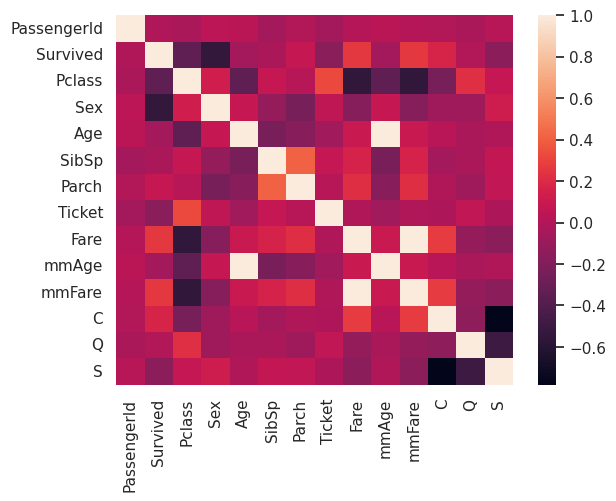

In [ ]:
sns.heatmap(train.corr(numeric_only = True));

Какие выводы можно сделать, анализируя эту матрицу? Какие признаки можно назвать существенными для выживаемости, а какие нет?

Дополнительные вопросы:
*   Есть ли среди наших данных дубликаты?
*   А как насчёт выбросов и аномалий? Если есть, можно/нужно ли их удалить?
*   Какие ещё есть способы заполнить пропуски значений возраста? Зависит ли распределение возраста от класса обслуживания? пола? Можно ли извлечь пользу из обращений (Mr, Mrs, Miss, Master и т.п.) в столбце `Name`?

`titanic['Age'] = titanic.groupby('Sex')['Age'].transform(lambda x:
                                                         x.fillna(x.median()))`

*   Полезно ли будет преобразовать или создать какие-то ещё признаки? Например, добавить бинарный признак "путешествует с родителями", подсчитать суммарное количество путешествующих совместно (семьёй), пересчитать стоимость билетов с учётом количества пассажиров, прошедших по каждому билету?

In [ ]:
!jupyter nbconvert --to html /content/Разведочный_анализ_1_2.ipynb

[NbConvertApp] Converting notebook /content/Разведочный_анализ_1_2.ipynb to html
[NbConvertApp] Writing 1414716 bytes to /content/Разведочный_анализ_1_2.html


Что дальше?

это начало вашей первой контрольной точки по Классификации.

Забираем любой датасет (кроме Iris, Wine, Abalon) по ссылке (внутри группы все датасеты должны быть разными):

 https://archive.ics.uci.edu/datasets?Task=Classification&skip=0&take=25&sort=desc&orderBy=NumHits&search=&Types=Tabular&Types=Text

  
1 часть
 1. Скачать один из наборов данных
 1. Загрузить данные в датафрейм
 1. Вывести статистическую информацию о наборе данных
 1. Вывести названия столбцов и строк
 1. Заменить категориальные данные количественными
 1. Визуализировать данные с помощью Matplotlib и Seaborn
   1. Должно быть не менее 2х визуализаций на каждый признак. Выберите самые красивые визуализации!
   1. Должно быть не менее 3х групповых визуализаций


